In [1]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import os
from skimage.transform import resize
import pandas as pd
from random import sample
%matplotlib inline

In [2]:
from os.path import join
#some parameters: images and labels directory and img dimensions and channels
TRAIN_PATH = "data/stage1_train/"
TEST_PATH = "data/stage1_test/"
IMG_DIR_NAME = "images"
LABELS_DIR_NAME = "masks"

IMG_WIDTH = 256
IMG_HEIGTH = 256
IMG_CHANNELS = 3

#get all names to use as id from inside the train and test path
train_ids = os.listdir(TRAIN_PATH) #all idsfrom TRAIN_PATH
test_ids = os.listdir(TEST_PATH) #ids from TEST_PATH
train_image_path = [glob.glob(join(TRAIN_PATH, train_id, IMG_DIR_NAME,"*"))[0] for train_id in train_ids]
test_image_path = [glob.glob(join(TEST_PATH, test_id, IMG_DIR_NAME, "*"))[0] for test_id in test_ids]

In [3]:
#creating list of training and test images to later append it to a dataframe
train_img = []
test_img = []

for i in range(0, len(train_image_path)):
    train_img.append(cv2.imread(train_image_path[i]))

for i in range(0, len(test_image_path)):
    test_img.append(cv2.imread(test_image_path[i]))

In [4]:
#image shape for further analysis
train_image_shape = []
test_image_shape = []
for i in range(0,len(train_image_path)):
    train_image_shape.append(cv2.imread(train_image_path[i]).shape)


for i in range(0,len(test_image_path)):
    test_image_shape.append(cv2.imread(test_image_path[i]).shape)

In [5]:
#building the DataFrame
df_train = pd.DataFrame({'Shapes': train_image_shape})
df_train['img_path'] = pd.DataFrame({'Path':train_image_path})
df_train['Image'] = pd.DataFrame({'Image':train_img})

df_test = pd.DataFrame({'Shapes':test_image_shape})
df_test['img_path'] = pd.DataFrame({'Path':test_image_path})
df_test['Image'] = pd.DataFrame({'Image':test_img})

In [6]:
#shape of images
test_size_count = df_test['Shapes'].value_counts()
test_size_count = pd.DataFrame(test_size_count)
test_size_count.reset_index(inplace = True)

train_size_count = pd.DataFrame(df_train['Shapes'].value_counts())
train_size_count.reset_index(inplace = True)

Text(0.5, 1.0, 'Distribution of train image sizes')

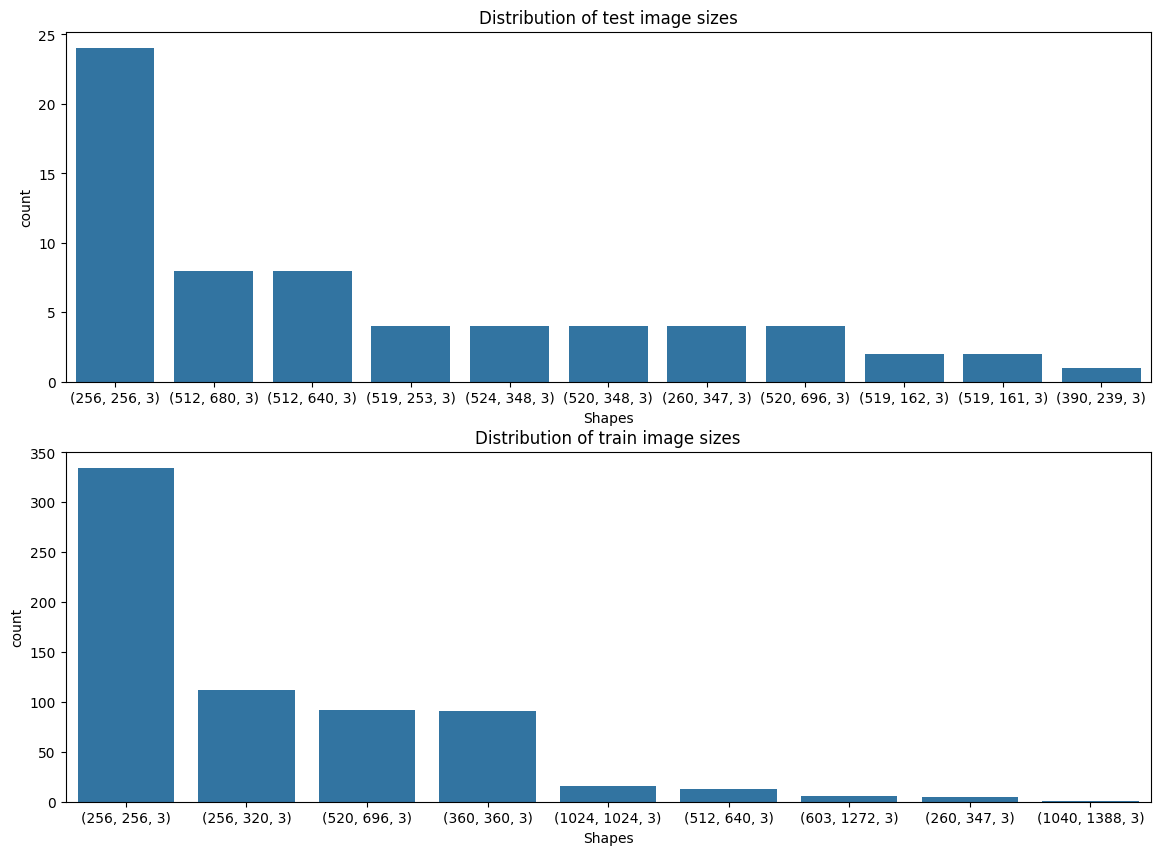

In [7]:
plt.figure(figsize = (14,10))
plt.subplot(2,1,1)
sns.barplot(data = test_size_count, x= test_size_count['Shapes'].astype("string"), y = test_size_count['count'])
plt.title('Distribution of test image sizes')

plt.subplot(2,1,2)
sns.barplot(data = train_size_count, x= train_size_count['Shapes'].astype("string"), y = train_size_count['count'])
plt.title('Distribution of train image sizes')

Most images on both sets are (256, 256, 3). We should resize the images to: 256, 256 (grayscale)

Red:  199.3050537109375 Green: 146.581689453125 Blue: 169.42706298828125


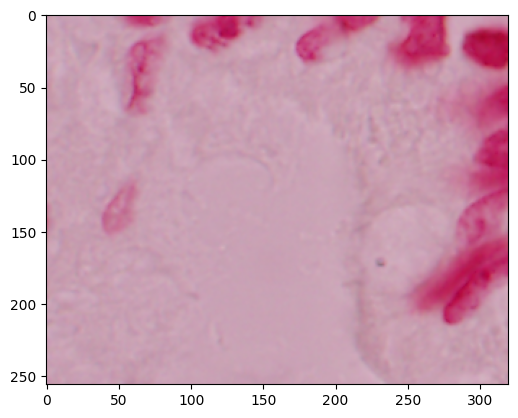

In [21]:
#mean intensity of red color of a single random sample image
x = sample(train_image_path, 1)
x = cv2.imread(x[0], cv2.IMREAD_ANYCOLOR)
x_r_mean = np.mean(x[:,:,0])
x_g_mean = np.mean(x[:,:,1])
x_b_mean = np.mean(x[:,:,2])

print('Red: ', x_r_mean,
    'Green:', x_g_mean,
    'Blue:', x_b_mean)
plt.imshow(x)


In [22]:
#building a simple distribution of intensity of color of all images in train data set
train_red_mean = []
train_green_mean = []
train_blue_mean = []
#red
for i in range(0,len(train_image_path)):
    x = cv2.imread(train_image_path[i])
    train_red_mean.append(np.mean(x[:,:,0]))

#green
for i in range(0, len(train_image_path)):
    x = cv2.imread(train_image_path[i])
    train_green_mean.append(np.mean(x[:,:,1]))

#blue
for i in range(0, len(train_image_path)):
    x = cv2.imread(train_image_path[i])
    train_blue_mean.append(np.mean(x[:,:,2]))

df_train['red'] = train_red_mean
df_train['green'] = train_green_mean
df_train['blue'] = train_blue_mean

In [23]:
#building a simple distribution of intensity of color of all images in test data set
test_red_mean = []
test_green_mean = []
test_blue_mean = []
#red
for i in range(0,len(test_image_path)):
    x = cv2.imread(test_image_path[i])
    test_red_mean.append(np.mean(x[:,:,0]))

#green
for i in range(0, len(test_image_path)):
    x = cv2.imread(test_image_path[i])
    test_green_mean.append(np.mean(x[:,:,1]))

#blue
for i in range(0, len(test_image_path)):
    x = cv2.imread(test_image_path[i])
    test_blue_mean.append(np.mean(x[:,:,2]))

df_test['red'] = test_red_mean
df_test['green'] = test_green_mean
df_test['blue'] = test_blue_mean

Text(0.5, 0.98, 'Test set: distribution of intensity of color')

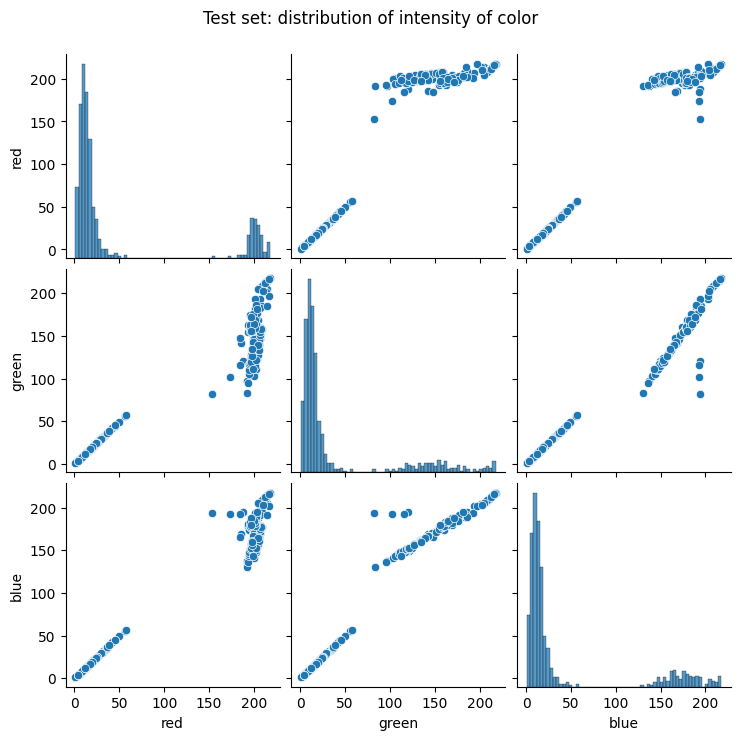

In [24]:
ax = sns.pairplot(df_train[['red', 'green', 'blue']])
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('Test set: distribution of intensity of color')

Text(0.5, 0.98, 'Train set: distribution of intensity of color')

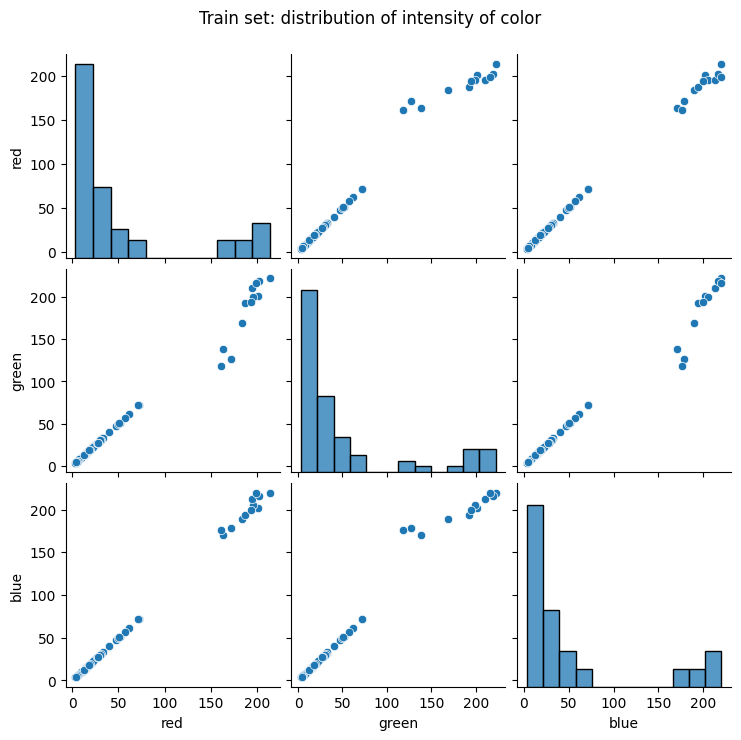

In [25]:
ax = sns.pairplot(df_test[['red', 'green', 'blue']])
ax.fig.subplots_adjust(top=0.92)
ax.fig.suptitle('Train set: distribution of intensity of color')

([], [])

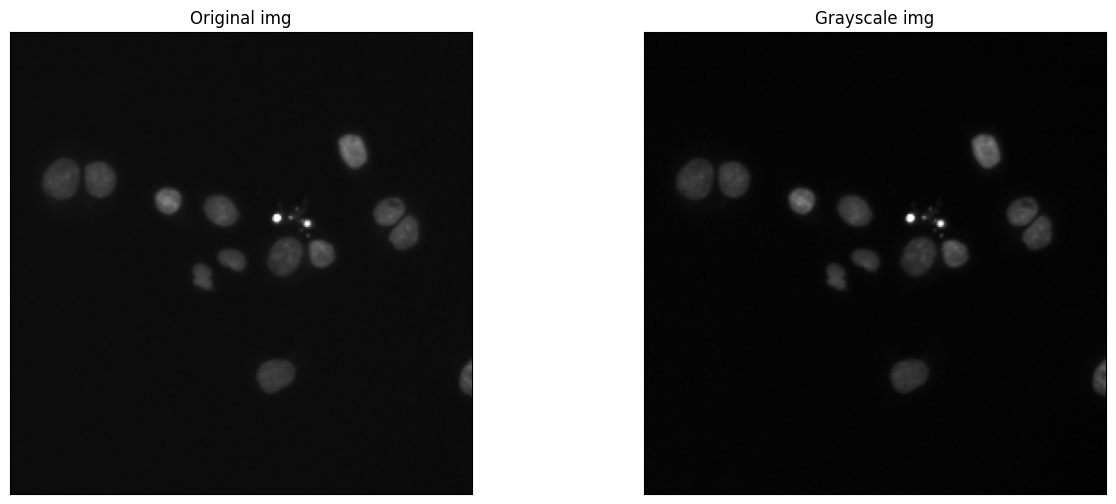

In [26]:
img_bgr = cv2.imread(train_image_path[5])

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
plt.imshow(img_bgr)
plt.title('Original img')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Grayscale img')
plt.yticks([])
plt.xticks([])

Text(0.5, 1.0, 'Histogram')

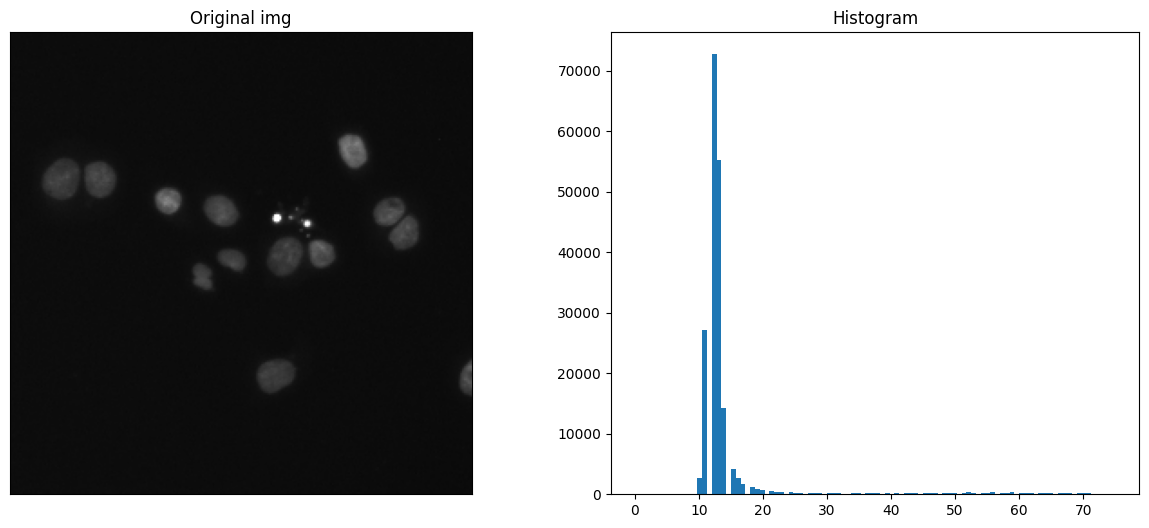

In [27]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.imshow(img_bgr)
plt.title('Original img')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
plt.hist(img_bgr.flat, bins = 100, range = (0,75))
plt.title('Histogram')


Text(0.5, 1.0, 'Eq img histogram')

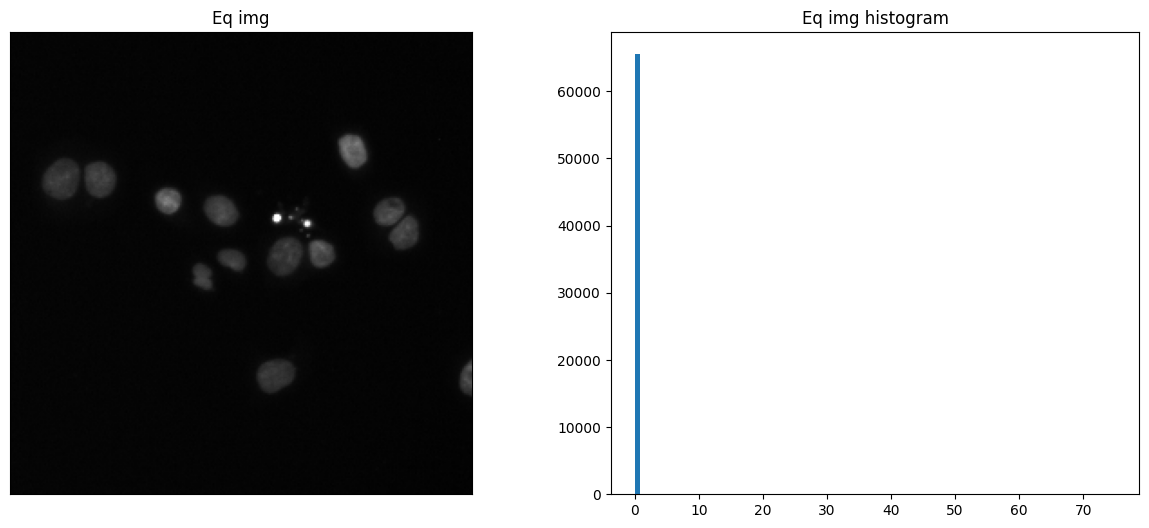

In [28]:
from skimage import exposure
eq_img = exposure.equalize_adapthist(img_gray)

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Eq img')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
plt.hist(eq_img.flat, bins = 100, range = (0,75))
plt.title('Eq img histogram')


#defining an automatic function for edge detection

def auto_canny_edge_detection(image, sigma=0.33):
    md = np.median(image)
    lower_value = int(max(0, (1.0-sigma) * md))
    upper_value = int(min(255, (1.0+sigma) * md))
    return cv2.Canny(image, lower_value, upper_value)

import numpy as np
auto_edge = auto_canny_edge_detection(img_gray)
plt.imshow(auto_edge, cmap = 'gray')
plt.yticks([])
plt.xticks([])

([], [])

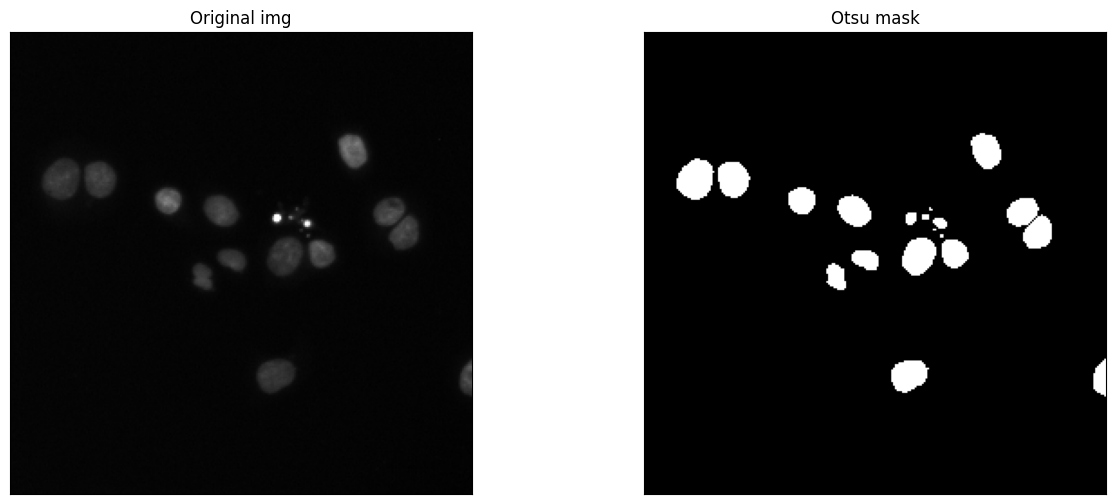

In [29]:
#segmenting the nuclei by applying otsu threshold

from skimage.filters import threshold_otsu

thresh_value = threshold_otsu(img_gray)

otsu_mask = np.where(img_gray>thresh_value,1,0)

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
plt.title('Original img')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
plt.imshow(otsu_mask, cmap = 'gray')
plt.title('Otsu mask')
plt.yticks([])
plt.xticks([])



In [52]:
#counting number of cell nuclei
from scipy import ndimage

ndimage.label(otsu_mask)
labels,nlabels=ndimage.label(otsu_mask)
print('There are',nlabels,'distinct nuclei in the mask.')
label_array = []

for i in range(1,nlabels+1):
    label_mask = np.where(labels==i,1,0)
    label_array.append(label_mask)


There are 19 distinct nuclei in the mask.


In [53]:
#defining otsu mask function
def apply_otsu_mask(image_bgr):
    thresh_value = threshold_otsu(image_bgr)
    otsu_mask_def = np.where(image_bgr>thresh_value,1,0)
    return thresh_value, otsu_mask_def

Text(0.5, 0.98, 'Grayscale images (top) with mask (bottom)')

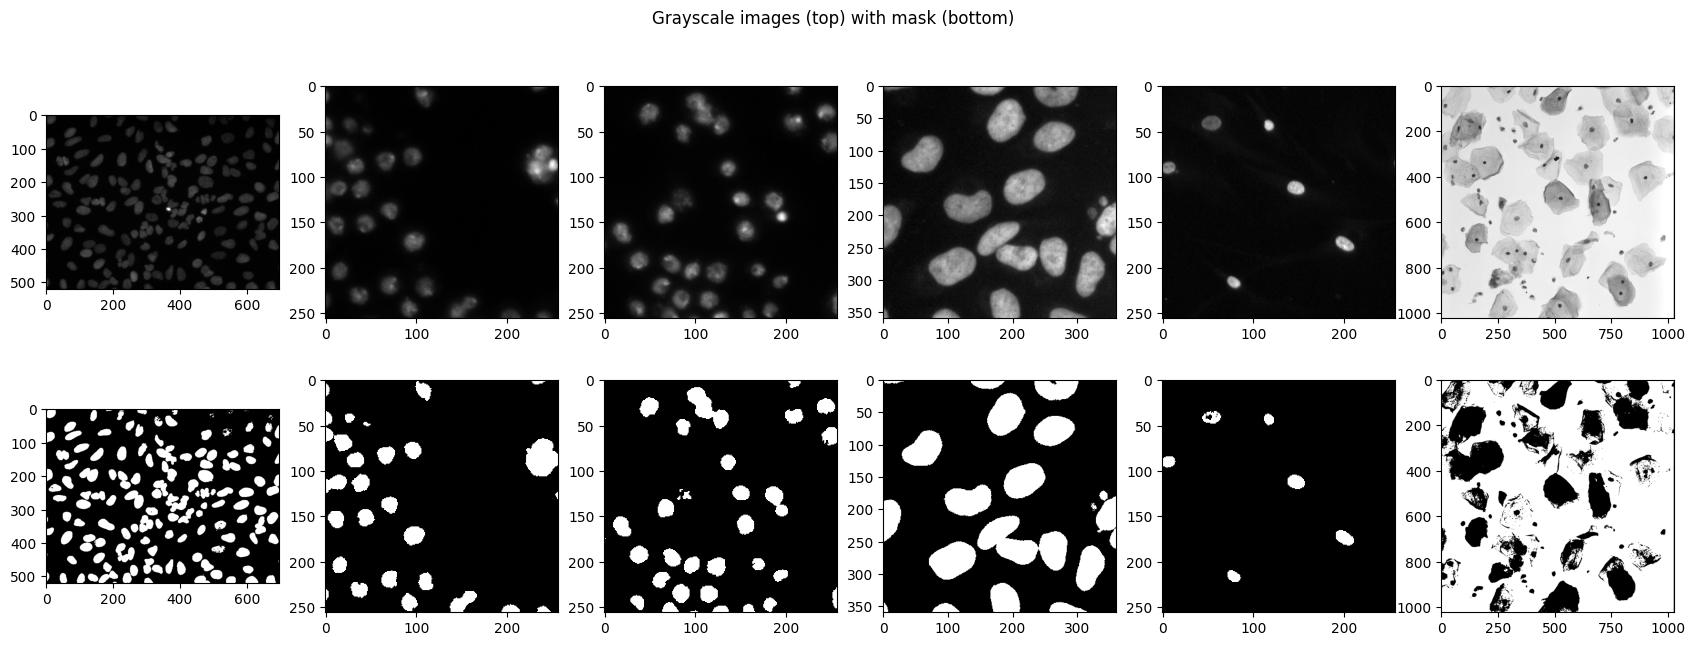

In [88]:
train_sample = sample(train_image_path, 6)

fig, axs = plt.subplots(ncols = len(train_sample), nrows = 2, figsize = (21, 7))

for i, (ax_im, ax_lab) in zip(range(len(train_sample)), axs.T):
    x = cv2.imread(train_sample[i])
    x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    ax_im.imshow(x, cmap = 'gray')
    thresh, x_mask = apply_otsu_mask(x)
    ax_lab.imshow(x_mask, cmap = 'gray')

fig.suptitle('Grayscale images (top) with mask (bottom)')

some images have white background, and some have a black background. We want all images to to have a black background. 
Let's fix this

In [92]:
original_otsu_threshold = []
otsu_threshold = []
original_otsu_mask = []
otsu_mask_ = []
for i in range(len(train_image_path)):
    x = cv2.imread(train_image_path[i])
    x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    thresh, mask = apply_otsu_mask(x)
    original_otsu_threshold.append(thresh)
    original_otsu_mask.append(mask)
    if thresh >= 110:
        mask = np.invert(mask)
        otsu_threshold.append(thresh)
        otsu_mask_.append(mask)
    else:
        otsu_threshold.append(thresh)
        otsu_mask_.append(mask)

In [93]:
df_train['otsu_threshold'] = pd.DataFrame({'otsu threshold': otsu_threshold})
df_train['otsu_mask'] = pd.DataFrame({'otsu mask': otsu_mask_})
df_train['original_otsu_threshold'] = pd.DataFrame({'original_otsu_thresh':original_otsu_threshold})
df_train['original_otsu_mask'] = pd.DataFrame({'original_otsu_mask': original_otsu_mask})

In [94]:
df_train.sample(3)

,Shapes,img_path,Image,red,green,blue,otsu_threshold,otsu_mask,original_otsu_threshold,original_otsu_mask
121,"(360, 360, 3)",data/stage1_train/2c840a94d216f5ef4e499b53ae88...,"[[[6, 6, 6], [6, 6, 6], [5, 5, 5], [6, 6, 6], ...",12.212431,12.212431,12.212431,16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
583,"(256, 256, 3)",data/stage1_train/df33b11184427e05c8a450f92158...,"[[[13, 13, 13], [13, 13, 13], [13, 13, 13], [1...",22.944107,22.944107,22.944107,57,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",57,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
149,"(256, 256, 3)",data/stage1_train/358e47eaa1e9222252793fe0fb8c...,"[[[33, 33, 33], [30, 30, 30], [28, 28, 28], [2...",16.431915,16.431915,16.431915,27,"[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",27,"[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(90.0, 150.0)

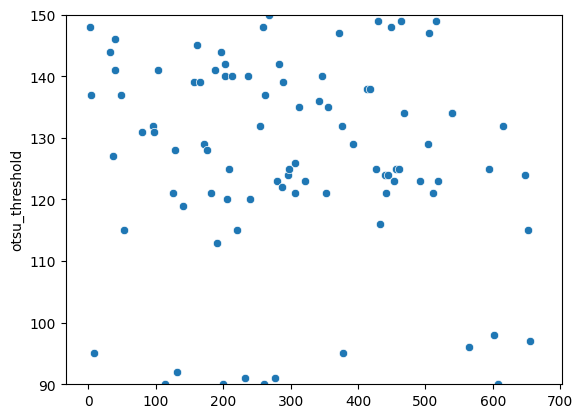

In [95]:
sns.scatterplot(df_train['otsu_threshold'])
plt.ylim(90, 150)

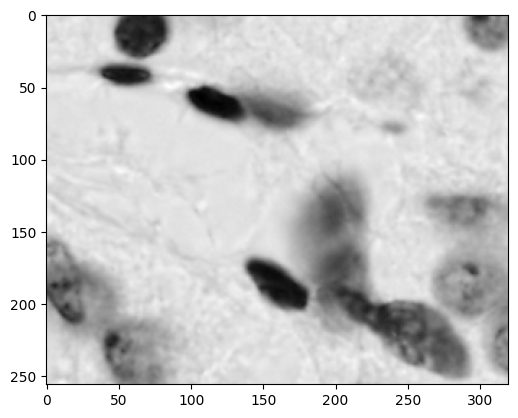

In [96]:
plt.imshow(cv2.imread(df_train['img_path'][392], cv2.IMREAD_GRAYSCALE), cmap = 'gray')

([], [])

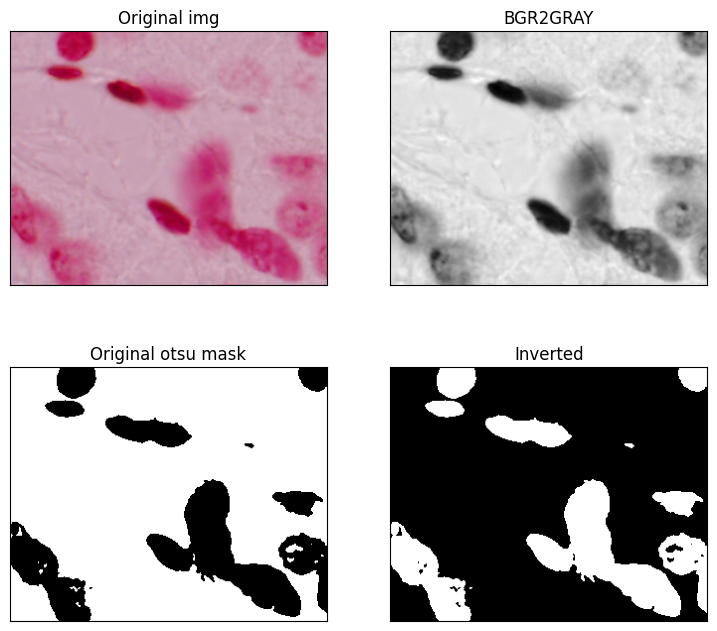

In [97]:
plt.figure(figsize=(9,8))

plt.subplot(2,2,1)
plt.imshow(df_train['Image'][392],  cmap = 'gray')
plt.title('Original img')
plt.yticks([])
plt.xticks([])

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(df_train['Image'][392], cv2.COLOR_BGR2GRAY),  cmap = 'gray')
plt.title('BGR2GRAY')
plt.yticks([])
plt.xticks([])

plt.subplot(2,2,3)
plt.imshow(df_train['original_otsu_mask'][392],  cmap = 'gray')
plt.title('Original otsu mask')
plt.yticks([])
plt.xticks([])

plt.subplot(2,2,4)
plt.imshow(df_train['otsu_mask'][392],  cmap = 'gray')
plt.title('Inverted')
plt.yticks([])
plt.xticks([])